In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Data Cleaning

## 1.1. Missing values

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.replace("", np.nan).isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.replace(" ", np.nan).isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df[df["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We drop the 11 rows with missing `TotalCharges`

In [8]:
df = df[df["TotalCharges"] != " "].reset_index(drop=True)

## 1.2. Casting types

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [11]:
# check the ones that have 3 distinct values
df[[col for col in df.nunique()[df.nunique() == 3].keys().tolist() if col not in ["Contract", "InternetService"]]].apply(pd.value_counts)

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
No,3385.0,3497.0,3087.0,3094.0,3472.0,2809.0,2781.0
No internet service,NaN,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0
No phone service,680.0,NaN,NaN,NaN,NaN,NaN,NaN
Yes,2967.0,2015.0,2425.0,2418.0,2040.0,2703.0,2731.0


In [12]:
exclude_bool = ["gender", "Contract", "InternetService", "SeniorCitizen", "MultipleLines"]
to_bool = [col for col in df.nunique()[df.nunique() <= 3].keys().tolist() if col not in exclude_bool]
to_bool

['Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [13]:
df[to_bool].apply(pd.value_counts)

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
No,3639.0,4933.0,680.0,3497,3087,3094,3472,2809,2781,2864.0,5163.0
No internet service,NaN,NaN,NaN,1520,1520,1520,1520,1520,1520,NaN,NaN
Yes,3393.0,2099.0,6352.0,2015,2425,2418,2040,2703,2731,4168.0,1869.0


In [14]:
for col in to_bool:
    df[col] = np.where(df[col] == "Yes", 1, 0)

In [15]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [16]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

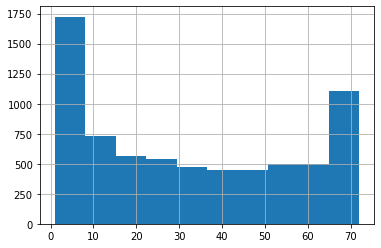

In [17]:
df["tenure"].hist();

In [18]:
id_col = ["customerID"]
target_col = ["Churn"]
cat_col = [col for col in df.nunique()[df.nunique() < 5].keys().tolist() if col not in target_col]
num_col = [col for col in df.columns if col not in cat_col + target_col + id_col]
bool_col = to_bool + ["SeniorCitizen"]

# 2. Split train and test

In [19]:
from sklearn.model_selection import train_test_split

In [34]:
train, test = train_test_split(df, test_size=.2, random_state=55)

train_X = train[cat_col + num_col].reset_index(drop=True)
train_y = train[target_col].reset_index(drop=True)
test_X = test[cat_col + num_col].reset_index(drop=True)
test_y = test[target_col].reset_index(drop=True)

# 3. Data preprocessing

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
# Standardize
std = StandardScaler()
scaled_fitted = std.fit(train_X[num_col])

Plotting what standardizing does

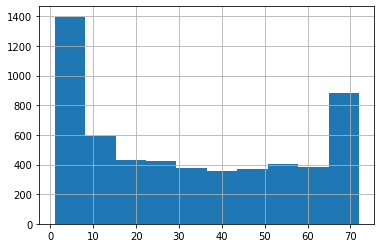

In [37]:
train_X["tenure"].hist()

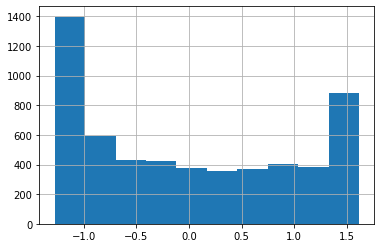

In [38]:
pd.DataFrame(scaled_fitted.transform(train_X[num_col]), columns=num_col)["tenure"].hist()

In [39]:
# standardize
scaled = scaled_fitted.transform(train_X[num_col])
scaled = pd.DataFrame(scaled, columns=num_col)

train_X = train_X.drop(columns=num_col, axis=1)
train_X = train_X.merge(scaled, left_index=True, right_index=True, how="inner")

In [40]:
train_X.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,Male,0,0,1,1,No,DSL,1,0,0,0,1,1,Month-to-month,1,Mailed check,-0.827677,0.168881,-0.637509
1,Male,1,1,0,0,No phone service,DSL,0,0,0,0,0,1,Month-to-month,0,Bank transfer (automatic),-0.216770,-0.939906,-0.551788
2,Male,0,1,1,1,No,No,0,0,0,0,0,0,Two year,1,Credit card (automatic),1.330861,-1.493469,-0.448196
3,Female,0,1,1,1,Yes,Fiber optic,0,0,0,0,1,1,Month-to-month,1,Electronic check,0.190502,1.013355,0.454013
4,Female,0,0,0,1,No,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,-0.827677,1.038291,-0.538523


In [41]:
# creating dummy variables for categorical features except booleans
train_X = pd.get_dummies(data=train_X,
                         columns=[col for col in cat_col if col not in bool_col],
                         drop_first=True)

In [42]:
# wrap preprocessing steps into a function
def preprocess(X, trained_standardization_factors):
    X = pd.get_dummies(data=X,
                       columns=[col for col in cat_col if col not in bool_col],
                       drop_first=True)
    
    scaled_X = trained_standardization_factors.transform(X[num_col])
    scaled_X = pd.DataFrame(scaled_X, columns=num_col)

    X = X.drop(columns=num_col, axis=1)
    X = X.merge(scaled_X, left_index=True, right_index=True, how="inner")
    
    return X

In [43]:
train_X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5625.0,1.608889e-01,0.367461,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,5625.0,4.830222e-01,0.499756,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,5625.0,2.986667e-01,0.457714,0.000000,0.000000,0.000000,1.000000,1.000000
PhoneService,5625.0,9.029333e-01,0.296075,0.000000,1.000000,1.000000,1.000000,1.000000
OnlineSecurity,5625.0,2.851556e-01,0.451529,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,5625.0,3.454222e-01,0.475548,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,5625.0,3.466667e-01,0.475951,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,5625.0,2.896000e-01,0.453617,0.000000,0.000000,0.000000,1.000000,1.000000
StreamingTV,5625.0,3.848889e-01,0.486612,0.000000,0.000000,0.000000,1.000000,1.000000
StreamingMovies,5625.0,3.873778e-01,0.487194,0.000000,0.000000,0.000000,1.000000,1.000000


# 4. Feature Selection

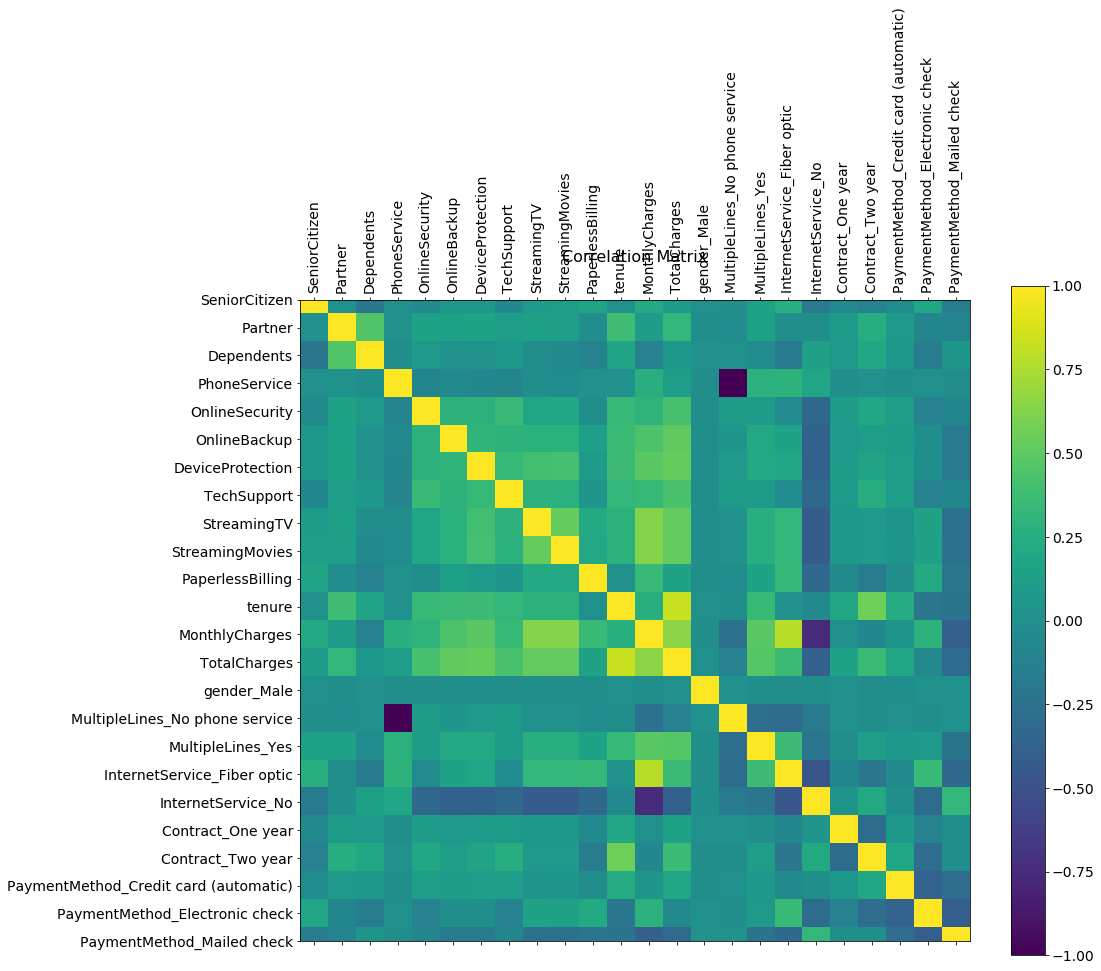

In [44]:
fig = plt.figure(figsize=(15,12))
plt.matshow(train_X.corr(), fignum=fig.number)
plt.xticks(range(train_X.shape[1]), train_X.columns, fontsize=14, rotation=90)
plt.yticks(range(train_X.shape[1]), train_X.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrix", fontsize=16);

# 5. Train Model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# train model
lr = LogisticRegression()
lr.fit(train_X, train_y)

# predict
test_X = preprocess(test_X, scaled_fitted)
pred = lr.predict(test_X)

# compute accuracry_score
accuracy_score(test_y, pred)

/Users/at/miniconda3/envs/day1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/at/miniconda3/envs/day1/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7434257285003554

Get probabilities

In [46]:
lr.predict_proba(test_X)

array([[0.9926893 , 0.0073107 ],
       [0.98728514, 0.01271486],
       [0.95138489, 0.04861511],
       ...,
       [0.90805125, 0.09194875],
       [0.94156194, 0.05843806],
       [0.75047714, 0.24952286]])

In [47]:
lr.predict(test_X)

array([0, 0, 0, ..., 0, 0, 0])

# Compare to previous model

In [51]:
def preprocess_o(df):
    services = ["PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
    df = df.assign(no_of_services=df[services].sum(axis=1))
    df = pd.concat([df,pd.get_dummies(df["Contract"], prefix="Contract")], axis=1)
    df = df.assign(automatic_payment=np.where(df["PaymentMethod"].str.contains("automatic"), 1, 0))
    return df

In [52]:
df_o = df.copy()


variables = ["no_of_services",
             "MonthlyCharges",
             "Contract_Month-to-month",
             "Contract_One year",
             "automatic_payment",
             "SeniorCitizen",
             "Partner",
             "Dependents"]

df_o = preprocess_o(df_o)
train_o, test_o = train_test_split(df_o, test_size=.2, random_state=55)

train_o_X = train_o[variables].reset_index(drop=True)
train_o_y = train_o[target_col].reset_index(drop=True)
test_o_X = test_o[variables].reset_index(drop=True)
test_o_y = test_o[target_col].reset_index(drop=True)

In [53]:
lr_o = LogisticRegression()
lr_o.fit(train_o_X, train_o_y)

pred_o = lr_o.predict(test_o_X)

accuracy_score(test_o_y, pred_o)

/Users/at/miniconda3/envs/day1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/at/miniconda3/envs/day1/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7768301350390903